In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2022-10-16 23:01:01.655727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 23:01:03.572697: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-16 23:01:03.572792: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-16 23:01:03.778051: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-16 23:01:10.290496: W tensorflow/stream_executor/platform/de

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

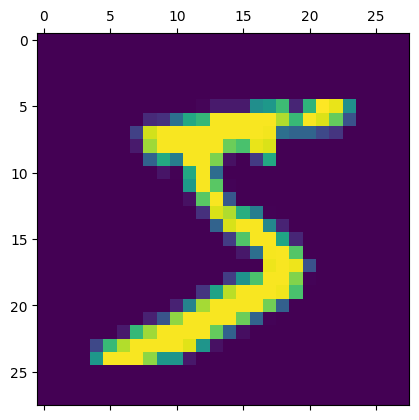

In [6]:
# len(X_train)
# X_train.shape
plt.matshow(X_train[0])

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [9]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

2022-10-16 23:01:24.638666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-16 23:01:24.653163: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-16 23:01:24.654654: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (karthikeya): /proc/driver/nvidia/version does not exist
2022-10-16 23:01:24.707505: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 23:01:26.662720: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceed

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4706 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9264


In [11]:
model.evaluate(X_test_flattened,y_test)

2022-10-16 23:01:47.747857: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9268


[0.2676030397415161, 0.926800012588501]

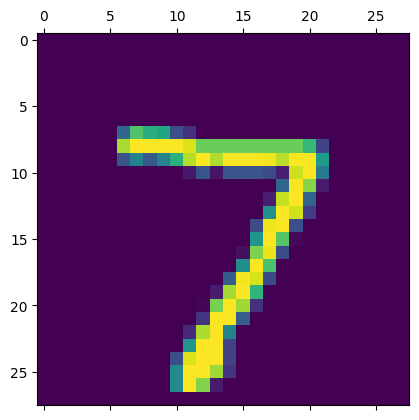

In [12]:
plt.matshow(X_test[0])

In [13]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [14]:
np.argmax(y_pred[0])

7

In [15]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    8,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    7,  930,   13,    9,    3,   12,    9,   41,    3],
       [   3,    0,   24,  913,    1,   25,    3,    8,   27,    6],
       [   1,    1,    4,    1,  918,    0,   10,    3,   10,   34],
       [  10,    3,    3,   27,   11,  768,   16,    6,   43,    5],
       [   9,    3,    8,    1,    8,   10,  913,    2,    4,    0],
       [   1,    5,   26,    5,    9,    1,    0,  942,    3,   36],
       [   7,    6,    6,   16,    9,   17,    9,   11,  887,    6],
       [  10,    6,    2,    9,   28,    6,    0,   13,    8,  927]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

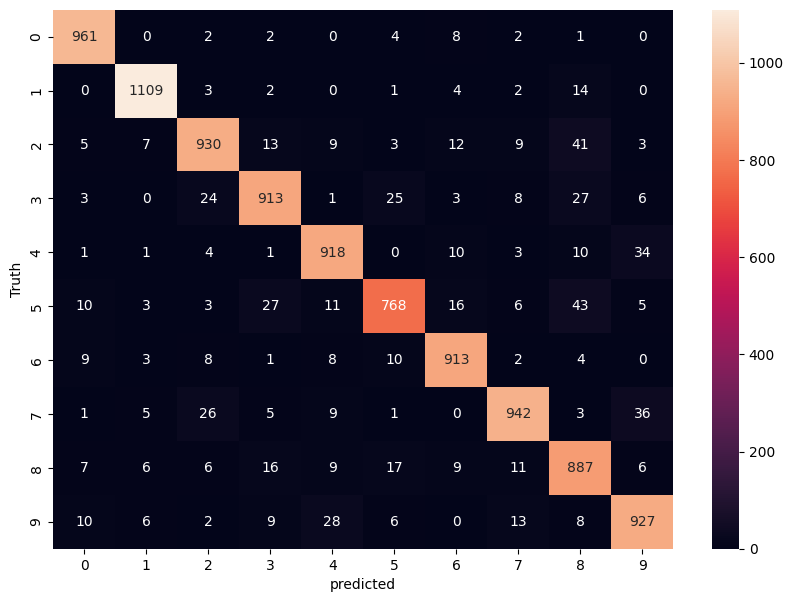

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=7)

2022-10-16 23:01:56.739148: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2705 - accuracy: 0.9232
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1227 - accuracy: 0.9633
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9748
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9840
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.9893


In [19]:
model.evaluate(X_test_flattened,y_test)

  1/313 [..............................] - ETA: 34s - loss: 0.0970 - accuracy: 0.9375

2022-10-16 23:02:28.747966: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9766


[0.07963220775127411, 0.9765999913215637]

In [20]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

 35/313 [==>...........................] - ETA: 0s 

2022-10-16 23:02:29.443784: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

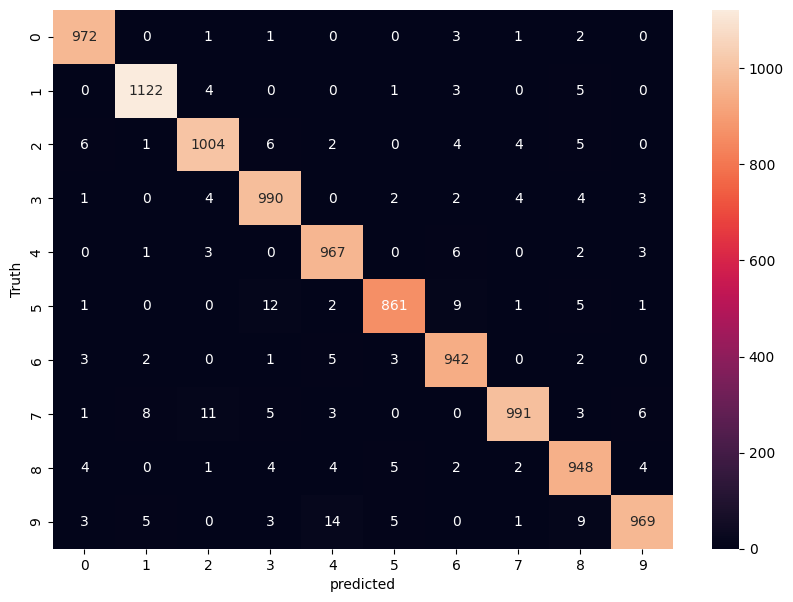

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='selu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)
model.fit(X_train,y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2431 - sparse_categorical_accuracy: 0.9275


In [26]:
number_labels = ['zero','one','two','three','four','five','six','seven','eight','nine']
y_pred = model.predict(X_test)
y_pred_labels = [number_labels[np.argmax(i)] for i in y_pred]
print(y_pred_labels[0])

313/313 [==============================] - 1s 2ms/step
seven
